In [13]:
import pandas as pd
import numpy as np
import nasdaqdatalink
from prophet import Prophet
import matplotlib.pyplot as plt

In [14]:
oil = pd.read_csv("C:/Users/Admin/Desktop/Data Capstone/Oil_Price.csv")
oil

,Date,Value
0,2003-01-02,30.05
1,2003-01-03,30.83
2,2003-01-06,30.71
3,2003-01-07,29.72
4,2003-01-08,28.86
...,...,...
4961,2022-03-25,115.99
4962,2022-03-28,113.39
4963,2022-03-29,110.05
4964,2022-03-30,110.46


In [15]:
oil['Date'] = pd.to_datetime(oil['Date'])

In [16]:
oil.columns=['ds','y']

In [17]:
m = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=0.75)

In [18]:
m.fit(oil)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5326,2023-03-27
5327,2023-03-28
5328,2023-03-29
5329,2023-03-30
5330,2023-03-31


In [20]:
forecast = m.predict(future)

In [21]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-01-02,29.647715,16.894482,35.037391,29.647715,29.647715,-3.333588,-3.333588,-3.333588,-3.333588,-3.333588,-3.333588,0.0,0.0,0.0,26.314127
1,2003-01-03,29.636543,17.187114,35.138537,29.636543,29.636543,-3.263344,-3.263344,-3.263344,-3.263344,-3.263344,-3.263344,0.0,0.0,0.0,26.373199
2,2003-01-06,29.603028,18.200794,35.765844,29.603028,29.603028,-3.063746,-3.063746,-3.063746,-3.063746,-3.063746,-3.063746,0.0,0.0,0.0,26.539282
3,2003-01-07,29.591856,17.998559,35.063076,29.591856,29.591856,-3.003446,-3.003446,-3.003446,-3.003446,-3.003446,-3.003446,0.0,0.0,0.0,26.588410
4,2003-01-08,29.580684,18.138121,35.338203,29.580684,29.580684,-2.947409,-2.947409,-2.947409,-2.947409,-2.947409,-2.947409,0.0,0.0,0.0,26.633276


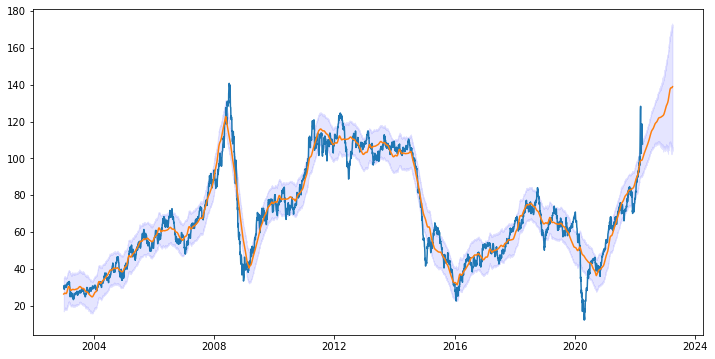

In [22]:
fig, ax = plt.subplots(figsize=(12,6))

x = oil['ds']
y = oil['y']

x_pred = forecast['ds']
yhat = forecast['yhat']

yhat_upper = forecast['yhat_upper']
yhat_lower = forecast['yhat_lower']

ax.plot(x,y)
ax.plot(x_pred,yhat)
ax.fill_between(x_pred, yhat_lower, yhat_upper, color='b', alpha=.1)

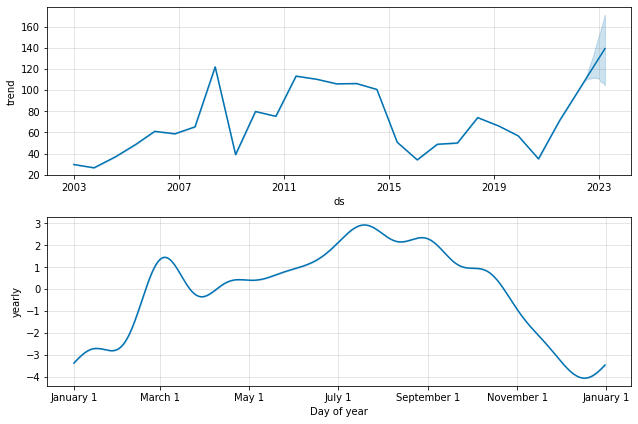

In [23]:
fig2 = m.plot_components(forecast)